In [1]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
# mesh size in both directions (NxN)
N = 40
l = 1.0

In [3]:
# compute the coordinates that we are interested in are in the middle of each Cartesian cell
mesh_coords = np.zeros((N * N, 2))
x_coords = np.arange(1 / (2 * N), 1, 1 / N)  # So that points are in centered in cells
y_coords = np.arange(1 / (2 * N), 1, 1 / N)

for i in range(N):
	for j in range(N):
		mesh_coords[i * N + j] = (x_coords[i], y_coords[j])

In [4]:
# define the given covariance functions
def covariance1(coord1, coord2, l):  # Exponential
	return np.exp(-np.linalg.norm(coord1 - coord2) / l, dtype=np.float64)

def covariance2(coord1, coord2, l):  # Squared exponential
    return np.exp(-np.linalg.norm(coord1 - coord2) ** 2 / (2 * l ** 2), dtype=np.float64)

In [24]:
# create data structures to hold the covariance matrices
covariance_matrix1 = np.zeros((N ** 2, N ** 2))
covariance_matrix2 = np.zeros((N ** 2, N ** 2))

In [6]:
# create the discrete covariance function, i.e. create covariance matrix
for i in range(N ** 2):
	for j in range(N ** 2):
		covariance_matrix1[i, j] = covariance1(mesh_coords[i], mesh_coords[j], l)
		covariance_matrix2[i, j] = covariance2(mesh_coords[i], mesh_coords[j], l)

In [28]:
# perform a Cholesky decomposition of the covariance matrix
L1 = np.linalg.cholesky(covariance_matrix1)
# L2 = np.linalg.cholesky(covariance_matrix2)

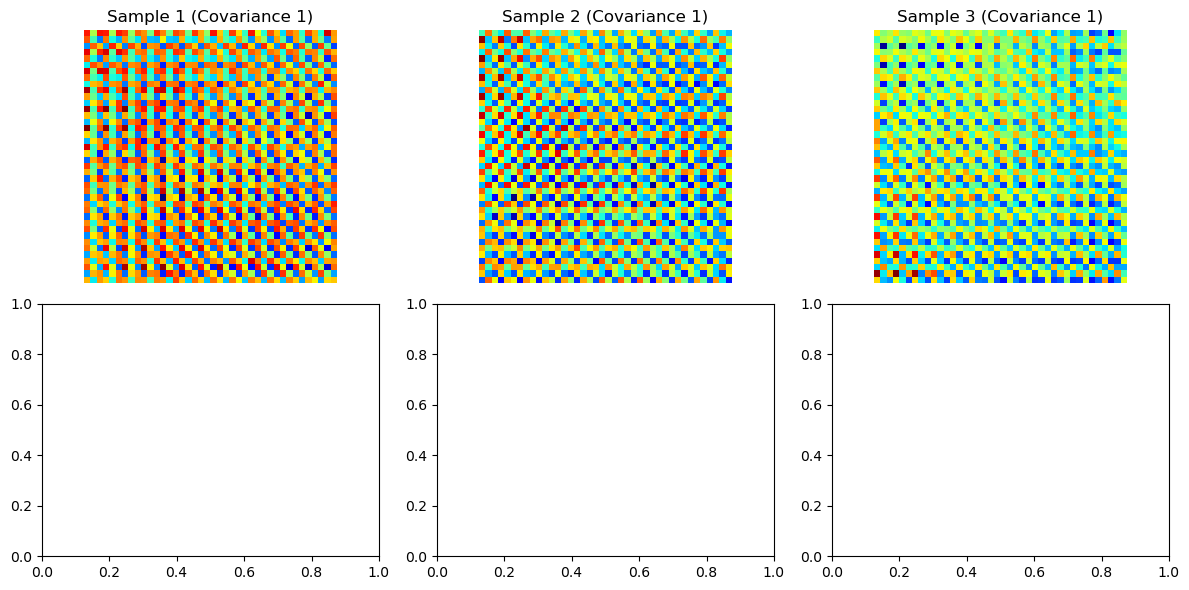

In [8]:
# plot the sample for cov_1
no_figures = 3

samples1 = np.dot(np.random.normal(0, 1, (N ** 2, no_figures)).T, L1.T)
samples1_grid = samples1.T.reshape(no_figures, N, N)
fig, axes = subplots(nrows=2, ncols=no_figures, figsize=(12, 6))

for i in range(no_figures):
	#figure()
		# sample from the given random field
		# plot the results <imshow(sample, cmap='coolwarm')>
	axes[0, i].imshow(samples1_grid[i], cmap='jet', origin='lower')
	axes[0, i].set_title(f'Sample {i + 1} (Covariance 1)')
	axes[0, i].axis('off')
    
tight_layout()
show()

Assignment 2.1 - Results:

The covariance matrix resulting from the squared exponential function did not meet the positive definiteness requirement, which prevented
further analysis. We suspect the choice of the lengthscale parameter as a possible cause for this issue but weren't able to further investigate 
this due to time constraints.

In [16]:
# Helper function
def ridge_reg(covariance_matrix, regularization_param):
    
    n = covariance_matrix.shape[0]
    regularized_matrix = covariance_matrix + regularization_param * np.eye(n)

    return regularized_matrix

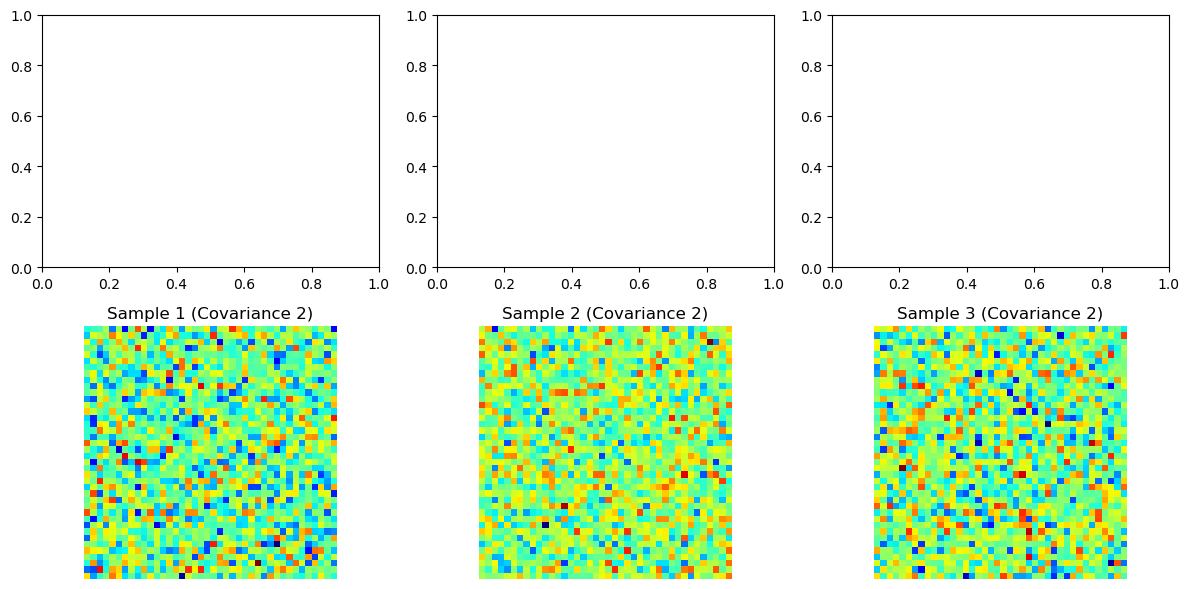

In [27]:
import math
L2 = ridge_reg(covariance_matrix2, np.float64(1e-14))
# plot the sample for cov_2
no_figures = 3
samples2 = np.dot(np.random.normal(0, 1, (N ** 2, no_figures)).T, L2.T)
samples2_grid = samples2.T.reshape(no_figures, N, N)
fig, axes = subplots(nrows=2, ncols=no_figures, figsize=(12, 6))
for i in range(no_figures):
	#figure()
		# sample from the given random field
		# plot the results, you can use <imshow(sample, cmap='coolwarm')>
	axes[1, i].imshow(samples2_grid[i], cmap='jet', origin='lower')
	axes[1, i].set_title(f'Sample {i + 1} (Covariance 2)')
	axes[1, i].axis('off')
tight_layout()
show()